In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
pd.reset_option('all')
import matplotlib.pyplot as plt

Consider "Rosenbrock" function

$f(x_1,x_2)=100(x_2-x_1)^2+(1-x_1)^2$

This function is known as the banana function because of the shape of its level sets. 

a. Prove that $x^*=[1,1]^T$ is the unique global minimizer of $f$ over $\mathbb{R^2}$

We know that if $f$ is a convex function and $\mathbb{R^2}$ is a convex set, then any local minimum of $f$ is its global minimum on $\mathbb{R^2}$. Therefore, we must prove that $f$ is a convex function and that $\mathbb{R^2}$ is a convex set.

First, to show that $\mathbb{R^2}$ is a convex set, we know that since the plane is closed under scalar multiplication and also under addition, then for any $x,y \in \mathbb{R^2}, \alpha x + (1-\alpha)y \in \mathbb{R^2}$. We see it is a convex set and compact as well.  

Generally, we would next show that $f$ is a convex function. However, we rely on the Weierstrass Theorem, which states that in a problem min $f(x) over \Omega$, if $f$ is continuous, $\Omega$ is compact, and if $f$ is coercive, which means lim $f(x) \rightarrow +\infty$ as $x \rightarrow \infty$. We must check if Rosenbrock function is coercive.

Since both summands are squared, we know that $f$ limits to positive infinity for large $x$, so $f$ is coercive. Therefore, the problem is convex. 

Therefore, $x^*=[1,1]^T$ is the unique global minimizer of $f$ over $\mathbb{R^2}$ if it is a local minimizer.

We use the second-order sufficient condition to show that $x^*=[1,1]^T$ is a local minimizer of $f$ over $\mathbb{R^2}$. This states that if $\nabla f(x^*)=0$ and $\nabla^2 f(x^*)$ is positive definite, then $x^*$ is a strict local minimizer of $f$ over $\mathbb{R^2}$.

First we check the first condition. We know that $\nabla f(x^*)=0$ because $\nabla f(x^*)=\begin{pmatrix} 400x_1^3-400x_1x_2+2x_1-2 \\ 200x_2-200x_1^2 \end{pmatrix}=\begin{pmatrix} 400-400 \\ 200-200 \end{pmatrix}=\begin{pmatrix} 0 \\ 0 \end{pmatrix}$. Then we check the second condition. We check that $\nabla^2 f(x^*)$ is positive definite by calculating its eigenvalues. 

We get $\nabla^2 f(x^*)= \begin{pmatrix} 1200x_1^2-400x_2+2 & -400x_1 \\ -400x_1 & 200 \end{pmatrix} = \begin{pmatrix} 1200-400+2 & -400 \\ -400 & 200 \end{pmatrix} = \begin{pmatrix} 802 & -400 \\ -400 & 200 \end{pmatrix}$. 

We recall that for a summetric matrix, the sign of the pivots gives the sign of the eigenvalues. We see that the pivots are positive, so the eigenvalues are positive. Therefore, $\nabla^2 f(x^*)$ is positive definite.

b. Write a method with signature function xsol = GradDescent($f$, grad, $x_0$).

The input $f$ and grad are function handles. The function $f: \mathbb{R^n} \rightarrow \mathbb{R}$ is an arbitrary objective function and grad: $\mathbb{R^n} \rightarrow \mathbb{R^n}$ is its gradient. The method should minimize $f$ using gradient descent and terminate when the gradient of $f$ is small. I suggest stopping when 

$||\nabla f(x^k)|| \leq ||\nabla f(x^0)|| * 10^{-4}$

Test your algorithm on Rosenbrock function and plot $||x^k-x^*||_2$ versus iteration number $k$ for various fixed stepsize selection of $\alpha = 0.001, 0.05 ,0.5$ and explain your observations. 

In [41]:
# Rosenbrock function
def rosenbrock(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

# Gradient of Rosenbrock function
def rosenbrock_grad(x):
    return np.array([-2*(1-x[0]) - 400*x[0]*(x[1]-x[0]**2), 200*(x[1]-x[0]**2)])

# function for gradient descent
def gradient_descent(f_grad, x0, alpha, threshold):
    # initialize empty dataframe with iteration, x, and test value
    df = pd.DataFrame(columns=['iteration', 'x', 'test_value','stepsize'])
    k = 0
    x = x0
    test = 100 # initialize test value with dummy value
    while k < 1000:
    #while test > threshold:
        k += 1
        x = x - alpha * f_grad(x)/np.linalg.norm(f_grad(x))
        test = np.linalg.norm(f_grad(x))
        # append iteration, x, and test value to dataframe
        df = df.append({'iteration': k, 'x': x, 'test_value': test, 'stepsize':alpha}, ignore_index=True)
    return df

# initial point
x0 = np.array([0,0])
# gradient at initial point
x0_grad = rosenbrock_grad(x0)

In [42]:
# run gradient descent for different step sizes 
# and append results to dataframe
df = pd.DataFrame(columns=['iteration', 'x', 'test_value','stepsize'])
for alpha in [0.001, 0.05, 0.5]:
    df_tmp = gradient_descent(rosenbrock_grad, x0, alpha, 0.001)
    df = df.append(df_tmp, ignore_index=True)
    
# calculate difference between x and x*
df['diff'] = df['x'].apply(lambda x: np.linalg.norm(x - np.array([1,1])))

# cast the step size to a string
df['stepsize'] = df['stepsize'].astype(str)

We have run the gradient descent on the Rosenbrock function with $\alpha = 0.001, 0.05, 0.5$ and plotted the results below. We see that the gradient descent converges to the minimum for $\alpha = 0.001$ and $\alpha = 0.05$. However, for $\alpha = 0.5$, the gradient descent diverges. This is because the step size is too large and the gradient descent overshoots the minimum, and then jumps back and forth.

We see for the small step size, the covergence is linear, but the best step size appears to be $\alpha = 0.05$.

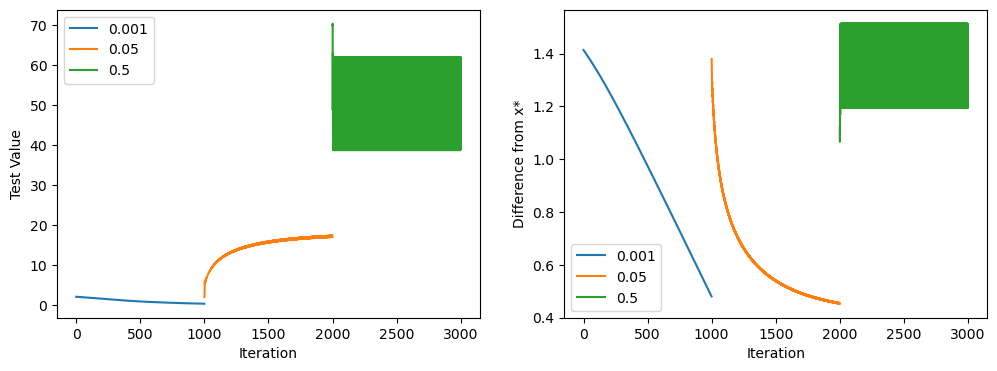

In [43]:
# line plot the diff by iteration, and  and color by step size
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df.groupby('stepsize')['test_value'].plot(legend=True, ax=ax[0])
df.groupby('stepsize')['diff'].plot(legend=True, ax=ax[1])
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Test Value')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Difference from x*')
plt.show()

c. Modify part b to create the new function xsol = GradDescentNesterov($f$,grad,$x_0$). This function should implement Nesterov's method, that is

$x^k=y^k-\alpha\nabla f(y^k)$

$\delta^{k+1} = \frac{a+\sqrt{1+4(\delta^k)^2}}{2}$

$y^{k+1}=x^k + \frac{\delta^k-1}{\delta^{k+1}}()x^k-x^{k-1}$

The method is initialized woth $x^0=y^1$ and the first interation has index $k=1$. Test your algorithm on Rosenbrock function and plot $||x^k-x^*||_2$ versus iteration number $k$ for various fixed stepsize selection of $\alpha = 0.001, 0.05 ,0.5$ and explain your observations.

In [44]:
# accelerated gradient descent by nesterov
def gradient_descent_nesterov(f_grad, x0, delta,alpha, threshold):
    # initialize empty dataframe with iteration, x, and test value
    df = pd.DataFrame(columns=['iteration', 'x', 'test_value','stepsize'])
    x = x0
    k = 0
    test = 100 # initialize test value with dummy value
    print(test)
    while k < 1000:
    #while test > threshold:
        k+=1
        x_old = x
        x = x_old - alpha * f_grad(x_old)/np.linalg.norm(f_grad(x_old))
        delta_old = delta
        delta = (1 + np.sqrt(1 + 4 * delta**2))/2
        x = x + ((delta_old - 1)/delta) * (x - x_old)
        test = np.linalg.norm(f_grad(x))
        # append iteration, x, and test value to dataframe
        df = df.append({'iteration': k, 'x': x, 'test_value': test,'stepsize':alpha}, ignore_index=True)
    return df


In [45]:
# run gradient descent with nesterov for different step sizes
df_nest = pd.DataFrame(columns=['iteration', 'x', 'test_value','stepsize'])
for alpha in [0.001, 0.05, 0.5]:
    df_tmp = gradient_descent_nesterov(rosenbrock_grad, x0,1, alpha, 0.001)
    df_nest = df_nest.append(df_tmp, ignore_index=True)
    
# calculate difference between x and x*
df_nest['diff'] = df_nest['x'].apply(lambda x: np.linalg.norm(x - np.array([1,1])))

100
100
100


Similarly to above, we have implemented the Nesterov method on the Rosenbrock function with $\alpha = 0.001, 0.05, 0.5$ and plotted the results below. We see that the Nesterov method converges to the minimum for $\alpha = 0.001$ and $\alpha = 0.05$. However, for $\alpha = 0.5$, the Nesterov method diverges, similar results as before. However, for the smaller step sizes, the Nesterov method converges faster than the non-modified gradient descent method. It is faster than linear. 

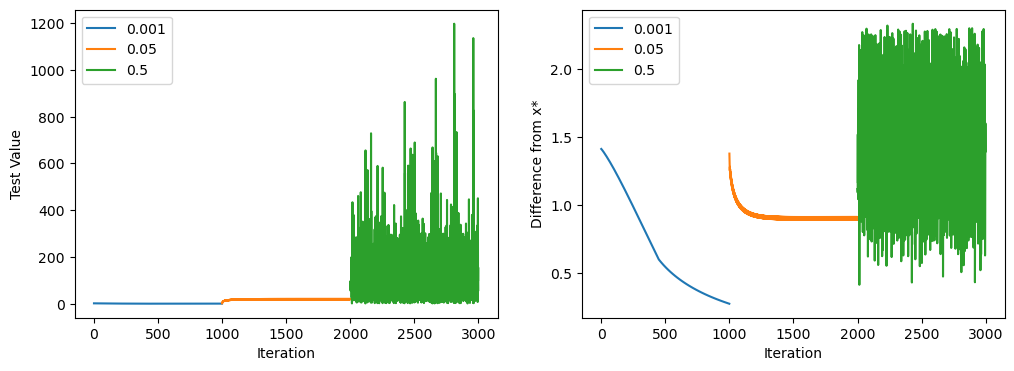

In [46]:
# plot the results, group and color by step size
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
df_nest.groupby('stepsize')['test_value'].plot(legend=True, ax=ax[0])
df_nest.groupby('stepsize')['diff'].plot(legend=True, ax=ax[1])
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Test Value')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Difference from x*')
plt.show()